In [24]:
import pandas as pd #importing the pandas package

In [25]:
import numpy as np #importing the numpy package

In [26]:
import matplotlib.pyplot as plt #importing the matplotlib package

In [27]:
%matplotlib inline 

In [28]:
import seaborn as sb #importing the seaborn package

In [29]:
data = pd.read_csv("C:\\Users\\tanuj\\Desktop\\Subjects\\DSP\\Project\\datanew_Second_Iterations_Two_Classifiers.csv") 
#reading the dataset

In [30]:
data.head() #Glimpse of the dataset

,Dealer_count,Hit,Outcome,Player_count,Stand
0,21,1,0,15,0
1,18,0,1,20,1
2,19,1,0,9,0
3,19,1,0,19,0
4,20,1,0,12,0


In [31]:
select_cols = ["Dealer_count","Player_count","Hit"] #Selecting the columns

In [32]:
x = data[select_cols] #appending the columns to the dataset and selecting the x variables

In [33]:
y= data.Outcome #Defining our Y variable which is outcome which can be win or loss

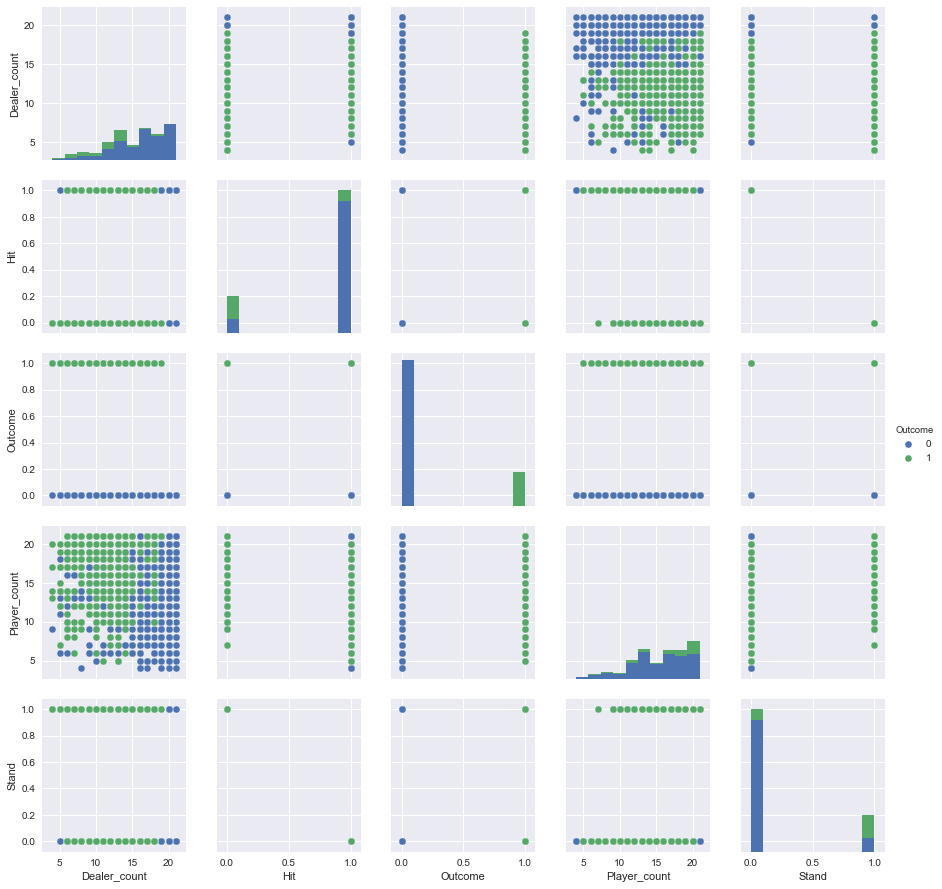

In [34]:
sb.pairplot(data,hue="Outcome") #Plotting the Y variable

In [35]:
from sklearn.model_selection import train_test_split #Importing the train and test function to split the dataset

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36,stratify=y) # Spliting the dataset

In [37]:
from sklearn.preprocessing import LabelEncoder #Importing the Label Code.

In [38]:
for columns in x_train.columns:
    if(x_train[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(X_train[columns].values)
        x_train.loc[:,columns]=encode.transform(x_train[columns].values) 

Using the Label Encoder to Encode the data values

In [39]:
from sklearn.neural_network import MLPClassifier #Importing the Multi Layer Percepton Model

In [40]:
Neural_MLP = MLPClassifier(hidden_layer_sizes=(13,23,33),max_iter=2500,learning_rate_init=0.001,momentum=0.01,solver='adam')

Hyperparamater Optimized the Neural Network

In [41]:
Neural_MLP.fit(x_train,y_train) #Fitting the Model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 23, 33), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.01,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
for columns in x_test.columns:
    if(x_test[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(x_test[columns].values)
        x_test.loc[:,columns]=encode.transform(x_test[columns].values)

In [43]:
y_pred = Neural_MLP.predict(x_test) #Predicting on Test DataSet

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [45]:
cm = confusion_matrix(y_test,y_pred) #Confusion Matrix

In [46]:
print(cm)

[[486  17]
 [ 66  52]]


In [282]:
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

          0       0.91      0.96      0.93       503
          1       0.77      0.60      0.68       118

avg / total       0.88      0.89      0.89       621



In [283]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.89049919484702089

With Three Classifier the result varies as for draw there are only 6 entries.

WIN

LOSS

DRAW

In [59]:
data_new = pd.read_csv("C:\\Users\\tanuj\\Desktop\\Subjects\\DSP\\Project\\nn_output_Win_Loss_Draw.csv") #reading the dataset

In [60]:
select_cols = ["Dealer_count","Player_count","Hit"]

In [61]:
x = data_new[select_cols] #appending the columns to the dataset

In [62]:
y= data_new.Outcome #Defining our Y variable which is Hit

In [52]:
from sklearn.model_selection import train_test_split #Importing the train and test function

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36,stratify=y)

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
for columns in x_train.columns:
    if(x_train[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(X_train[columns].values)
        x_train.loc[:,columns]=encode.transform(x_train[columns].values)

In [229]:
from sklearn.neural_network import MLPClassifier

In [230]:
Neural_MLP = MLPClassifier(hidden_layer_sizes=(13,23,33),max_iter=2500,learning_rate_init=0.001,momentum=0.01,solver='adam')

In [231]:
Neural_MLP.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 23, 33), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.01,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [232]:
for columns in x_test.columns:
    if(x_test[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(x_test[columns].values)
        x_test.loc[:,columns]=encode.transform(x_test[columns].values)

In [233]:
y_pred = Neural_MLP.predict(x_test)

In [234]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [235]:
cm = confusion_matrix(y_test,y_pred)

In [236]:
print(cm) 

[[483  19   0]
 [ 81  37   0]
 [ 11   6   0]]


From this confusion matrix we can clearly understand that it cannot classify between the third variable as there are only 50 entries of the draw classifier so it is less than 5% of the total number of entries.

In [237]:
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

          0       0.84      0.96      0.90       502
          1       0.60      0.31      0.41       118
          2       0.00      0.00      0.00        17

avg / total       0.77      0.82      0.78       637



C:\Users\tanuj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [238]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.81632653061224492